### Variable to calculate: Mean Southern Ocean salinity (psu) in the SPSS biome, see RECCAP mask in google folder (variable name ‘southern’, value=2)



## Notebook for calculating GCB 2023 evaluation metric:
##### Mean Southern Ocean salinity (psu) in the SPSS biome, see RECCAP mask in google folder (variable name ‘southern’, value=2)

#### step 1) - get sos (surface salinity) timeseries in runGCB.bsub 

    `python createGCB_RECCAP.py 9 #varID 13 sos`
    
#### step 2) calculate surface salinity for the biome shown above 


    Note: to convert from g/kg to psu, do [S_gkg] * 35.000/35.16504 = S_psu
    - (from regular grid, assuming sizes of boxes the same as there is no cell size in the mask)
    - will need to change filepath from f'/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/CAL12/sos_PlankTOM_{sim}_1_gr_1959-2022_v20230707.nc' in different years
    
    
#### Final data:
    [mep22dku@c0006 /gpfs/data/greenocean/GCB/GCB2023/submissionData2023/CAL12]$ ls SO_SSS_PlankTOM_*
    -rw-r--r-- 1 mep22dku greenocean 18432 Jul 10 09:39 SO_SSS_PlankTOM_A_1_gr_1959-2022_v20230710.nc
    -rw-r--r-- 1 mep22dku greenocean 18432 Jul 10 09:39 SO_SSS_PlankTOM_B_1_gr_1959-2022_v20230710.nc
    -rw-r--r-- 1 mep22dku greenocean 18432 Jul 10 09:39 SO_SSS_PlankTOM_C_1_gr_1959-2022_v20230710.nc
    -rw-r--r-- 1 mep22dku greenocean 18432 Jul 10 09:39 SO_SSS_PlankTOM_D_1_gr_1959-2022_v20230710.nc

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

In [3]:
import numpy as np
from cmocean import cm
import matplotlib.pyplot as plt
import xarray as xr

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
from importlib import reload
import matplotlib.path as mpath
import glob
import arrow
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
save = True #saving netcdfs?

### Let's look at the RECCAP regional mask

In [5]:
w = xr.open_dataset('./RECCAP2_region_masks_all_v20221025.nc')
tdat2 = xr.open_dataset('/gpfs/data/greenocean/GCB/GCB_RECCAP/MakeAncillary/AncillaryData_v3.nc')



3


Text(0.5, 1.0, 'csize mask, for SPSS biome')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


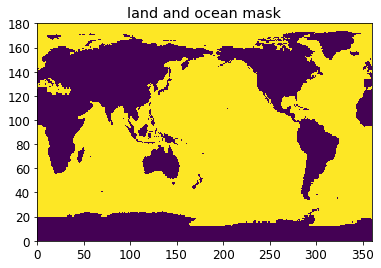

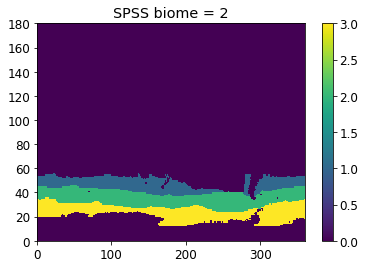

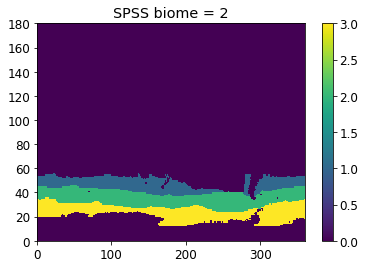

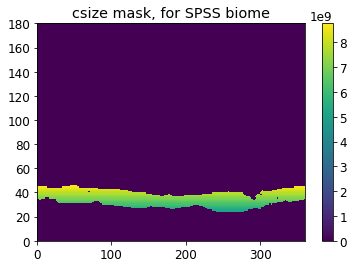

In [6]:
plt.figure()
plt.pcolormesh(w.seamask)
plt.title('land and ocean mask')
plt.figure()
q = plt.pcolormesh(w.southern)
plt.colorbar(q)
plt.title('SPSS biome = 2')

##copy mask 

SO_SPSS = np.copy(w.southern.values)
SO_SPSS_csize = np.copy(tdat2.AREA.values)
print(np.nanmax(SO_SPSS))
t = np.where(SO_SPSS != 2)
SO_SPSS_csize[t] = 0

plt.figure()
q = plt.pcolormesh(SO_SPSS)
plt.colorbar(q)
plt.title('SPSS biome = 2')

plt.figure()
q = plt.pcolormesh(SO_SPSS_csize)
plt.colorbar(q)
plt.title('csize mask, for SPSS biome')

# get timeseries of SO_SSS and save as .nc

In [7]:
tdat2 = xr.open_dataset('/gpfs/data/greenocean/GCB/GCB_RECCAP/MakeAncillary/AncillaryData_v3.nc')


sim = 'A'
sos_dataset = f'/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/CAL12/Tier1/sos_PlankTOM_{sim}_1_gr_1959-2022_v20230707.nc'
td = xr.open_dataset(sos_dataset)

In [9]:

def get_SO_SSS(sos_dataset):

    w2 = xr.open_dataset(sos_dataset)

    tdat = w2.sos.values
    tlen = (np.shape(tdat))[0] #length of timeseries
    SO_SSS = np.zeros(tlen)


    for i in range(0,tlen):
        tsos = tdat[i,:,:]
        isnan = np.where(np.isnan(tsos))
        tsos[isnan] = 0

        #print(np.where((tsos == 0) & (SO_SPSS_csize != 0)))
        SO_SPSS_csize[tsos == 0] = 0
        #print(np.where((tsos == 0) & (SO_SPSS_csize != 0)))
        SO_SSS[i] = np.average(tsos, weights = SO_SPSS_csize) #* 35.000/35.16504
        
    return SO_SSS

if save:

    sim = 'A'
    sos_dataset = f'/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/sos_PlankTOM_{sim}_1_gr_1959-2022_v20230829.nc'
    SO_SSS_A = get_SO_SSS(sos_dataset)

    sim = 'B'
    sos_dataset = f'/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/sos_PlankTOM_{sim}_1_gr_1959-2022_v20230829.nc'
    SO_SSS_B = get_SO_SSS(sos_dataset)

    sim = 'C'
    sos_dataset = f'/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/sos_PlankTOM_{sim}_1_gr_1959-2022_v20230829.nc'
    SO_SSS_C = get_SO_SSS(sos_dataset)

    sim = 'D'
    sos_dataset = f'/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/sos_PlankTOM_{sim}_1_gr_1959-2022_v20230829.nc'
    SO_SSS_D = get_SO_SSS(sos_dataset)

In [10]:
## get a nice time format
sim = 'A'
sos_dataset = glob.glob(f'/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/CAL12/Tier1/sos_PlankTOM_{sim}_1_gr_1959-2022_v*nc')[0]
w2 = xr.open_dataset(sos_dataset)
nicetime = w2.TIME

def make_so_sss_nc(nicetime, tdat, simulationID, yrFrom = 1959, yrTo = 2022):

    utc = arrow.utcnow()
    timestamp = utc.format('YYYYMMDD')
    resultsdir = '/gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/'
    parm = 'SO_SSS'
    outputFile = f'{resultsdir}{parm}_PlankTOM_{simulationID}_1_gr_{yrFrom}-{yrTo}_v{timestamp}.nc'
    data_vars = {'SO_SSS':(['TIME'], tdat,
    {'units': 'psu',
    'long_name':'Mean Southern Ocean salinity (psu) in the SPSS biome, see RECCAP mask in google folder (variable name ‘southern’, value=2)'}),
    }
    # define coordinates
    coords = {'TIME': (['TIME'], nicetime)}
    # define global attributes
    attrs = {'made in':'/gpfs/data/greenocean/GCB/GCB2023/scripts/makeSO_SSS.ipynb',
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(outputFile)
    

### here we save the netcdfs

In [11]:

if save:
    make_so_sss_nc(nicetime, SO_SSS_A, 'A')
    make_so_sss_nc(nicetime, SO_SSS_B, 'B')
    make_so_sss_nc(nicetime, SO_SSS_C, 'C')
    make_so_sss_nc(nicetime, SO_SSS_D, 'D')

## plot result

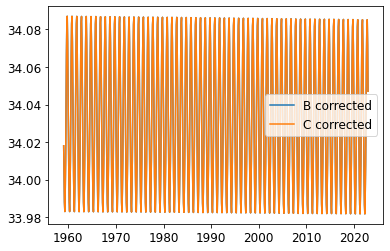

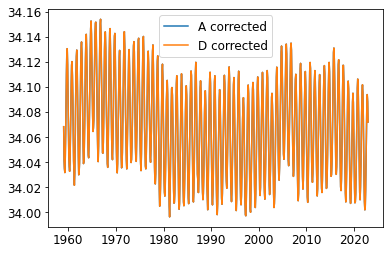

In [12]:

# w = xr.open_dataset(glob.glob('//gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/SO_SSS_PlankTOM_A_1_gr_1959-2022_*.nc')[0])
# w2 = xr.open_dataset(glob.glob('//gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/SO_SSS_PlankTOM_B_1_gr_1959-2022_*.nc')[0])
# w3 = xr.open_dataset(glob.glob('//gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/SO_SSS_PlankTOM_C_1_gr_1959-2022_*.nc')[0])
# w4 = xr.open_dataset(glob.glob('//gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/SO_SSS_PlankTOM_D_1_gr_1959-2022_*.nc')[0])

ww = xr.open_dataset(glob.glob('//gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/SO_SSS_PlankTOM_A_1_gr_1959-2022_*.nc')[0])
ww2 = xr.open_dataset(glob.glob('//gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/SO_SSS_PlankTOM_B_1_gr_1959-2022_*.nc')[0])
ww3 = xr.open_dataset(glob.glob('//gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/SO_SSS_PlankTOM_C_1_gr_1959-2022_*.nc')[0])
ww4 = xr.open_dataset(glob.glob('//gpfs/data/greenocean/GCB/GCB2023/submissionData2023/RIV12/Tier1/SO_SSS_PlankTOM_D_1_gr_1959-2022_*.nc')[0])


plt.figure()
# plt.plot(w.TIME, w2.SO_SSS, label = 'B')
# plt.plot(w.TIME, w3.SO_SSS, label = 'C')

plt.plot(ww.TIME, ww2.SO_SSS, label = 'B corrected')
plt.plot(ww.TIME, ww3.SO_SSS, label = 'C corrected')

plt.legend()


plt.figure()
# plt.plot(w.TIME, w.SO_SSS, label = 'A')
# plt.plot(w.TIME, w4.SO_SSS, label = 'D')
plt.plot(ww.TIME, ww.SO_SSS, label = 'A corrected')
plt.plot(ww.TIME, ww4.SO_SSS, label = 'D corrected')

plt.legend()
